In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def read_csv_as_dict(filename):
    asdict = dict()
    with open(filename, 'r') as f:
        reader = csv.reader(f)
        data = list(reader)
        for k in data[0]:
            asdict[k] = []
        for row in data[1:]:
            for i, k in enumerate(data[0]):
                asdict[k].append(row[i])
        for k in asdict.keys():
            asdict[k] = np.array(asdict[k], dtype=np.float64)
    return asdict

def plot_sorted_curves(d, title, slic=slice(None,None), exclude=[]):
    for i in range(len(d.keys())):
        if i+1 not in exclude:
            plt.plot(sorted(d[f'mac_{i+1}'])[slic], label=f'mac_{i+1}')
    plt.legend()
    plt.ylabel('Time (us)')
    plt.xlabel('Iteration')
    plt.title(title)

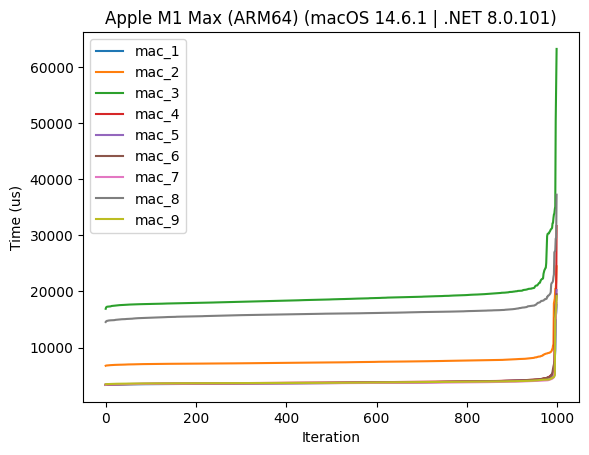

In [3]:
mac = read_csv_as_dict('microbenchmark/results_mac.csv')
mac_title = 'Apple M1 Max (ARM64) (macOS 14.6.1 | .NET 8.0.101)'
plot_sorted_curves(mac, mac_title, slice(None,None), [])
plt.savefig('figures/mac_raw.png')

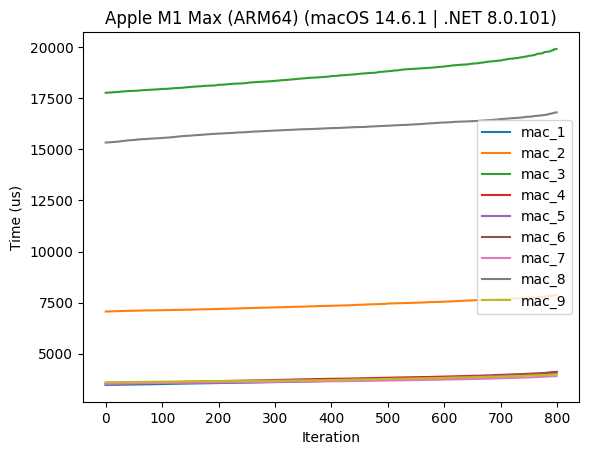

In [4]:
plot_sorted_curves(mac, mac_title, slice(100,-100), [])
plt.savefig('figures/mac_trimmed.png')

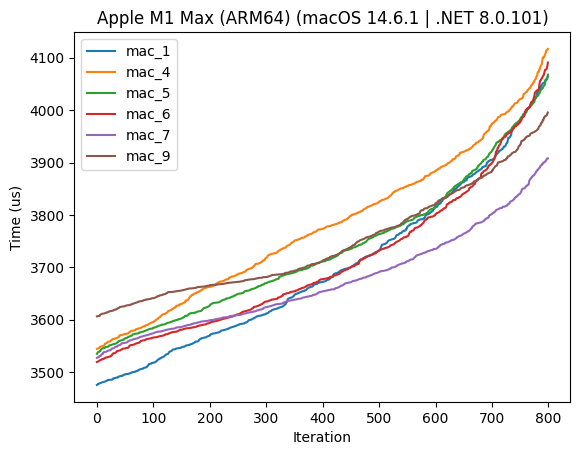

In [5]:
plot_sorted_curves(mac, mac_title, slice(100,-100), [3,8,2])
plt.savefig('figures/mac_trimmed_excluded.png')

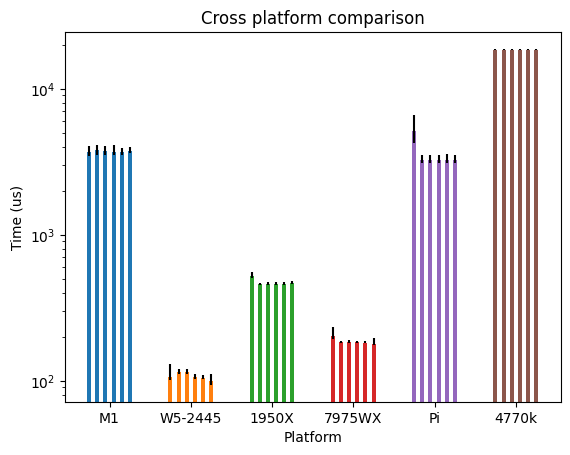

In [6]:
# Plot the mean along min and max error bars as a bar plot
plt.figure()

ds = [
    mac,
    read_csv_as_dict('microbenchmark/results_w5.csv'),
    read_csv_as_dict('microbenchmark/results_t00.csv'),
    read_csv_as_dict('microbenchmark/results_t02.csv'),
    read_csv_as_dict('microbenchmark/results_pi.csv'),
    read_csv_as_dict('microbenchmark/results_win.csv'),
]

for i, d in enumerate(ds):
    means = []
    mins = []
    maxs = []
    for j in range(9):
        if j not in [7, 2, 1]:
            percentiled = sorted(d[f'mac_{j+1}'])[100:-100]
            means.append(np.mean(percentiled))
            mins.append(np.min(percentiled))
            maxs.append(np.max(percentiled))

    barwidth = .05
    barspacing = .1
    plt.bar(i + np.arange(len(means))*barspacing - 5*barwidth, means, barwidth, yerr=[[imean - imin for imean, imin in zip(means, mins)], [imax - imean for imean, imax in zip(means, maxs)]])

plt.title('Cross platform comparison')
plt.ylabel('Time (us)')
plt.xlabel('Platform')
plt.yscale('log')
plt.xticks(np.arange(6), ['M1', 'W5-2445', '1950X', '7975WX', 'Pi', '4770k'])

plt.savefig('figures/cross_platform.png')